# Waze Project

This notebook covers Courses 2, 3 and 4 in one go

**==========================================================================================================**

## Project Course 2 Description

Your Waze data analytics team is still in the early stages of their user churn project. Previously, you were asked to complete a project proposal by your supervisor, May Santner. You have received notice that your project proposal has been approved and that your team has been given access to Waze's user data. To get clear insights, the user data must be inspected and prepared for the upcoming process of exploratory data analysis (EDA).

## Project Course 3 Description

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

## Project Course 4 Description

You receive a new email from Sylvester Esperanza, your project manager. Sylvester tells your team about a new request from leadership: to analyze the relationship between mean amount of rides and device type. You also discover follow-up emails from three other team members: May Santner, Chidi Ga, and Harriet Hadzic. These emails discuss the details of the analysis. They would like a statistical analysis of ride data based on device type. In particular, leadership wants to know if there is a statistically significant difference in mean amount of rides between iPhone® users and Android™ users. A final email from Chidi includes your specific assignment: to conduct a two-sample hypothesis test (t-test) to analyze the difference in the mean amount of rides between iPhone users and Android users.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|label |Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 	|
|sessions |	The number of occurrence of a user opening the app during the month |
|drives |	An occurrence of driving at least 1 km during the month |
|device |	The type of device a user starts a session with |
|total_sessions |A model estimate of the total number of sessions since a user has onboarded	|
|n_days_after_onboarding |The number of days since a user signed up for the app	|
|total_navigations_fav1 |Total navigations since onboarding to the user’s favorite place 1	|
|total_navigations_fav2 |Total navigations since onboarding to the user’s favorite place 2	|
|driven_km_drives |	Total kilometers driven during the month |
|duration_minutes_drives |	Total duration driven in minutes during the month |
|activity_days |Number of days the user opens the app during the month	|
|driving_days |Number of days the user drives (at least 1 km) during the month	|


## Data sources used

This project uses a dataset called waze_dataset.csv. It contains synthetic data created for this project in partnership with Waze. 

## Project 2 Business Task

**The purpose** of this project is to investigate and understand the data provided.

**The goal** is to use a dataframe contructed within Python, perform a cursory inspection of the provided dataset, and inform team members of your findings.
<br/>

*This activity has three parts:*

**Part 1:** Understand the situation
* How can you best prepare to understand and organize the provided information?

**Part 2:** Understand the data

* Create a pandas dataframe for data learning, future exploratory data analysis (EDA), and statistical activities

* Compile summary information about the data to inform next steps

**Part 3:** Understand the variables

* Use insights from your examination of the summary data to guide deeper investigation into variables

## Project 3 Business Task

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>

## Project 4 Business Task

In this activity, you will explore the data provided and conduct a hypothesis test.
<br/>

**The purpose** of this project is to demostrate knowledge of how to conduct a two-sample hypothesis test.

**The goal** is to apply descriptive statistics and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How did computing descriptive statistics help you analyze your data?

* How did you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>


## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

#import pandas_profiling
#from pandas_profiling import ProfileReport
#import sweetviz

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
#from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

# Use Folium library to plot values on a map.
#import folium

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Import Data

In [2]:
df = pd.read_csv("waze_dataset.csv", low_memory=False)

## Data Quick Glance

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.75,2276,208,0,2628.85,1985.78,28,19,Android
1,1,retained,133,107,326.90,1225,19,64,13715.92,3160.47,13,11,iPhone
2,2,retained,114,95,135.52,2651,0,0,3059.15,1610.74,14,8,Android
3,3,retained,49,40,67.59,15,322,7,913.59,587.20,7,3,iPhone
4,4,retained,84,68,168.25,1562,166,5,3950.20,1219.56,27,18,Android


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
df.dtypes.value_counts()

int64      8
float64    3
object     2
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.00,14299,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,NaN,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,7499.00,NaN,80.63,67.28,189.96,1749.84,121.61,29.67,4039.34,1860.98,15.54,12.18,NaN
std,4329.98,NaN,80.70,65.91,136.41,1008.51,148.12,45.39,2502.15,1446.70,9.00,7.82,NaN
min,0.00,NaN,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00,NaN
25%,3749.50,NaN,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00,NaN
50%,7499.00,NaN,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00,NaN
75%,11248.50,NaN,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00,NaN


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7499.00,80.63,67.28,189.96,1749.84,121.61,29.67,4039.34,1860.98,15.54,12.18
std,4329.98,80.70,65.91,136.41,1008.51,148.12,45.39,2502.15,1446.70,9.00,7.82
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00
25%,3749.50,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00
50%,7499.00,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00
75%,11248.50,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00
max,14998.00,743.00,596.00,1216.15,3500.00,1236.00,415.00,21183.40,15851.73,31.00,30.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,label,device
count,14299,14999
unique,2,2
top,retained,iPhone
freq,11763,9672


In [9]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days', 'device'], dtype='object')

In [10]:
df.shape

(14999, 13)

In [11]:
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.fillna(0, inplace=True)

In [14]:
df.duplicated().sum()

0

**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [15]:
df = df.sample(frac=0.25)

In [16]:
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
12012,12012,retained,300,241,352.35,2771,77,0,4604.33,3312.22,14,12,iPhone
13818,13818,retained,5,5,14.81,543,89,52,2729.33,643.09,27,22,iPhone
2205,2205,retained,26,21,100.17,2411,73,21,3132.71,1724.41,27,23,iPhone
6703,6703,retained,5,5,216.64,2329,108,0,1010.13,536.89,6,4,iPhone
5470,5470,churned,54,48,105.97,1108,0,50,4319.07,1214.12,15,9,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13542,13542,retained,87,87,224.22,1015,3,61,3190.47,494.06,23,19,Android
1940,1940,retained,52,42,67.98,3265,0,0,1943.86,533.46,26,24,iPhone
10848,10848,retained,73,58,169.80,2844,9,3,3441.53,2555.29,31,22,Android
4905,4905,churned,32,27,49.42,3027,0,15,4353.48,297.52,8,8,iPhone


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,12012,retained,300,241,352.35,2771,77,0,4604.33,3312.22,14,12,iPhone
1,13818,retained,5,5,14.81,543,89,52,2729.33,643.09,27,22,iPhone
2,2205,retained,26,21,100.17,2411,73,21,3132.71,1724.41,27,23,iPhone
3,6703,retained,5,5,216.64,2329,108,0,1010.13,536.89,6,4,iPhone
4,5470,churned,54,48,105.97,1108,0,50,4319.07,1214.12,15,9,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,13542,retained,87,87,224.22,1015,3,61,3190.47,494.06,23,19,Android
3571,1940,retained,52,42,67.98,3265,0,0,1943.86,533.46,26,24,iPhone
3572,10848,retained,73,58,169.80,2844,9,3,3441.53,2555.29,31,22,Android
3573,4905,churned,32,27,49.42,3027,0,15,4353.48,297.52,8,8,iPhone


In [19]:
df.shape

(3575, 13)

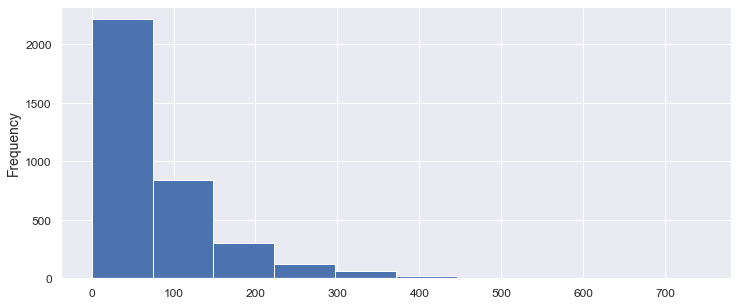

In [20]:
df.sessions.plot(kind = "hist", figsize = (12,5), fontsize = 12)
plt.show()

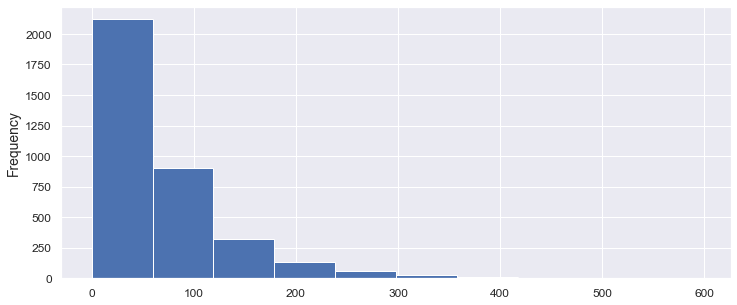

In [21]:
df.drives.plot(kind = "hist", figsize = (12,5), fontsize = 12)
plt.show()

In [22]:
df.label.value_counts().sort_values(ascending=False)

retained    2934
churned      641
Name: label, dtype: int64

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [23]:
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding', 'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', 'activity_days', 'driving_days', 'device'], dtype='object')

In [24]:
bylabel = df.groupby(["label"], as_index=True).median()
bylabel

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7408.00,58.00,49.00,162.45,1293.00,81.00,10.00,3639.32,1608.16,8.00,6.00
retained,7673.50,55.00,46.00,161.41,1831.00,70.00,9.00,3456.79,1463.71,17.00,13.00


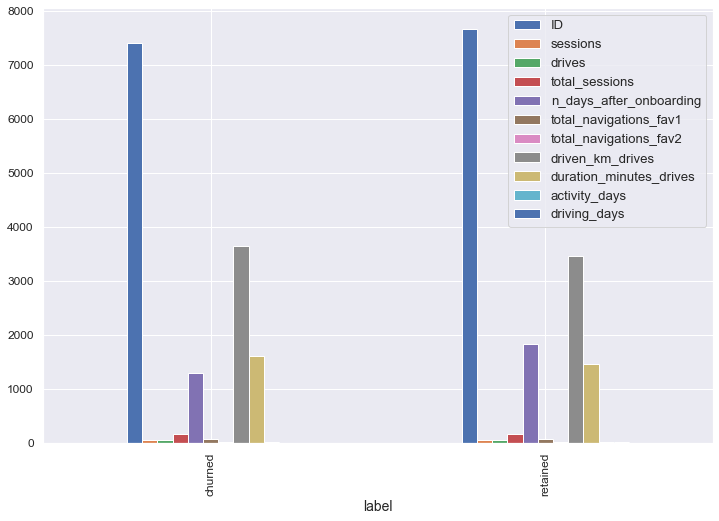

In [25]:
bylabel.plot(kind = "bar", figsize = (12,8), fontsize = 12)
plt.legend(loc="best")
plt.show()

In [26]:
bydevice = df.groupby(['device'], as_index=False)["sessions","drives"].mean()
bydevice

,device,sessions,drives
0,Android,79.62,66.48
1,iPhone,78.27,65.32


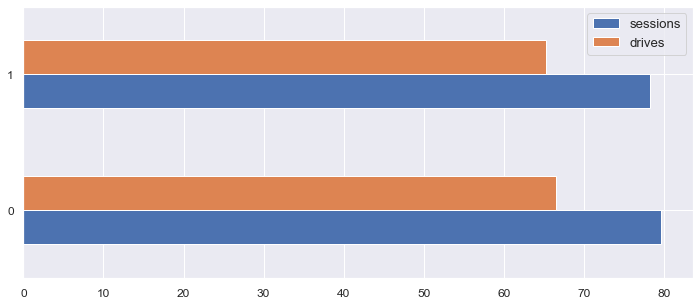

In [27]:
bydevice.plot(kind = "barh", figsize = (12,5), fontsize = 12)
plt.show()

**==========================================================================================================**

# Data Visualization

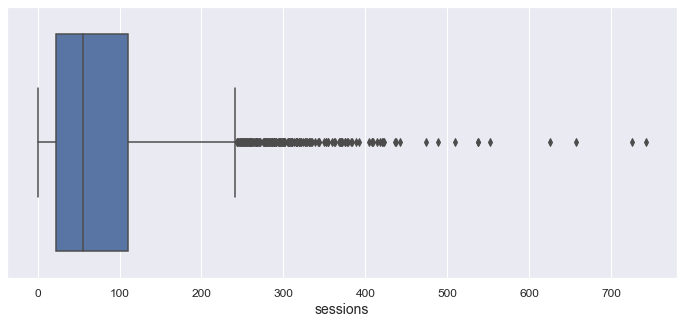

In [28]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="sessions", data=df)
plt.show()

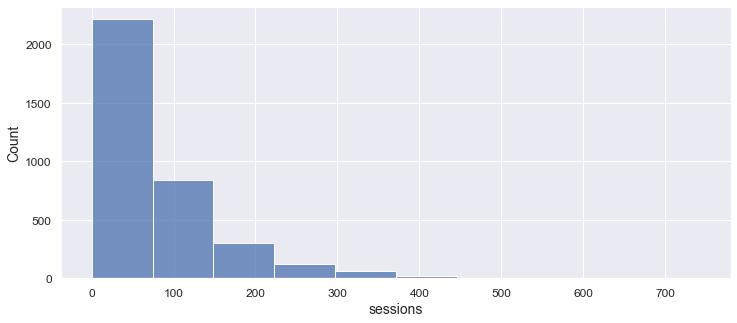

In [29]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x="sessions", data=df, bins=10)

plt.show()

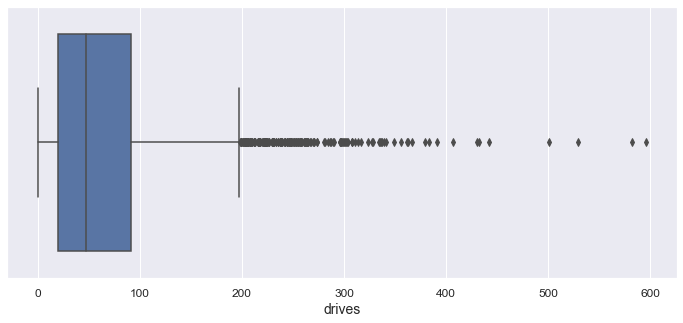

In [30]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="drives", data=df)
plt.show()

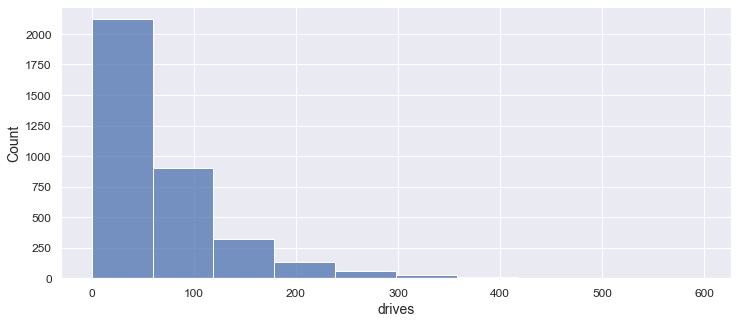

In [31]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x="drives", data=df, bins=10)

plt.show()

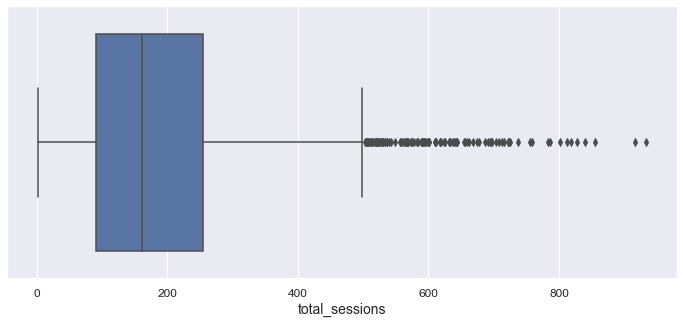

In [32]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="total_sessions", data=df)
plt.show()

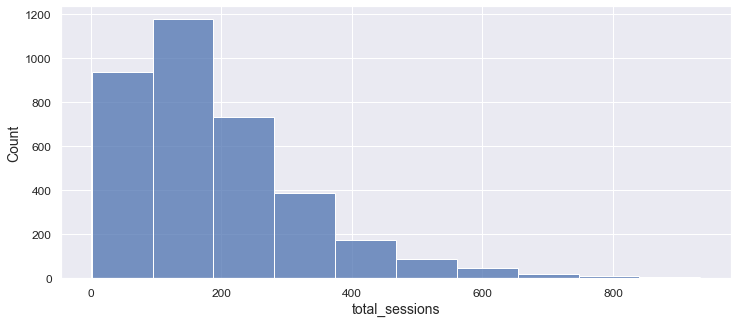

In [33]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x="total_sessions", data=df, bins=10)

plt.show()

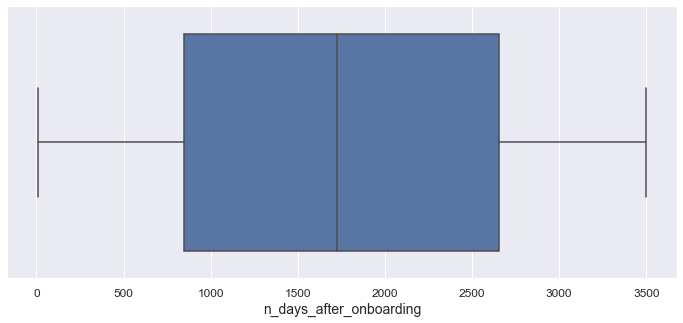

In [34]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="n_days_after_onboarding", data=df)
plt.show()

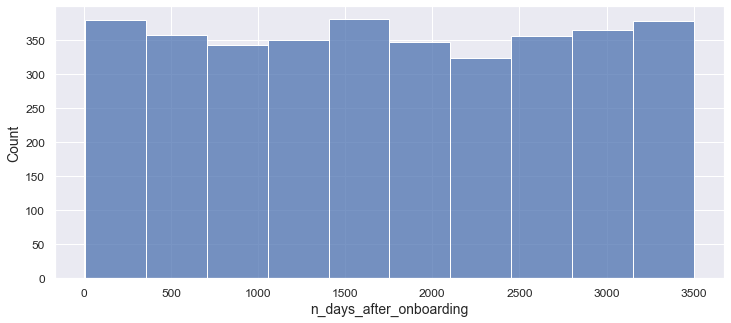

In [35]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x="n_days_after_onboarding", data=df, bins=10)

plt.show()

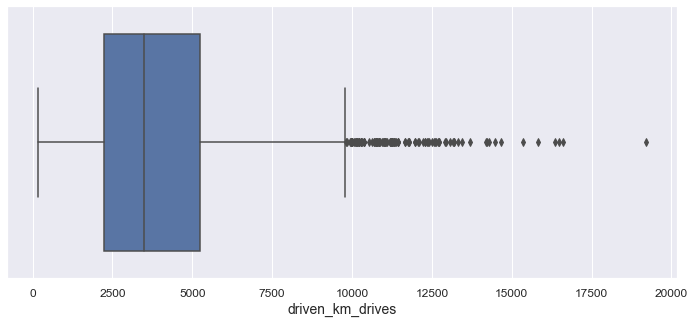

In [36]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="driven_km_drives", data=df)
plt.show()

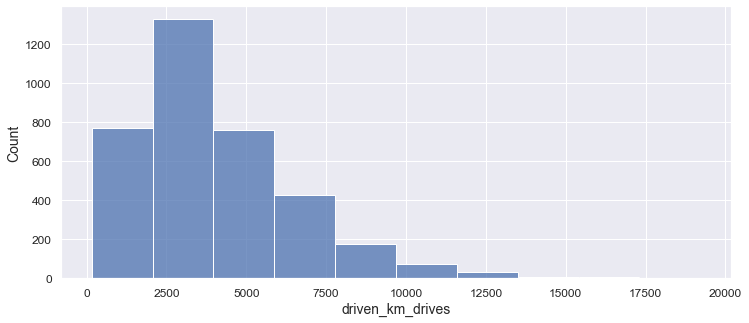

In [37]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x="driven_km_drives", data=df, bins=10)

plt.show()

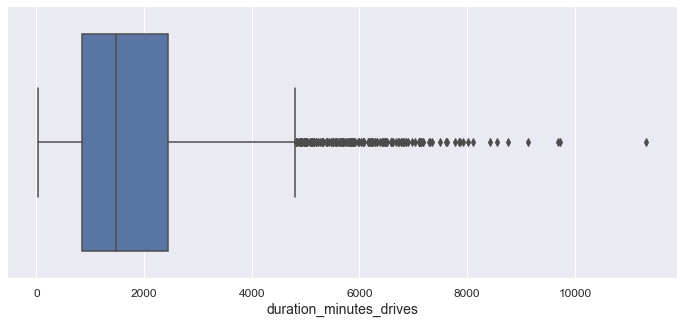

In [38]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="duration_minutes_drives", data=df)
plt.show()

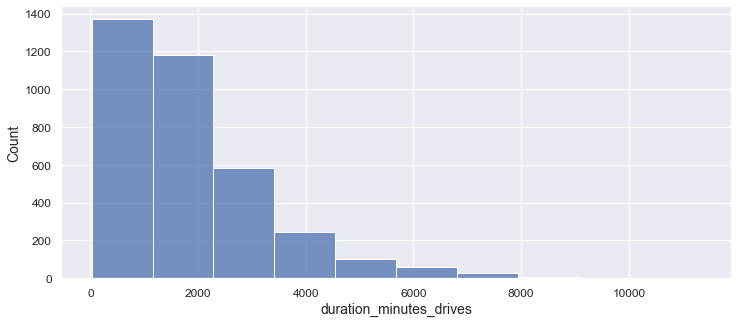

In [39]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x="duration_minutes_drives", data=df, bins=10)

plt.show()

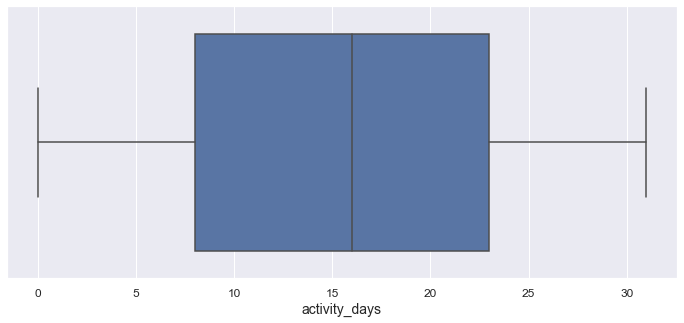

In [40]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="activity_days", data=df)
plt.show()

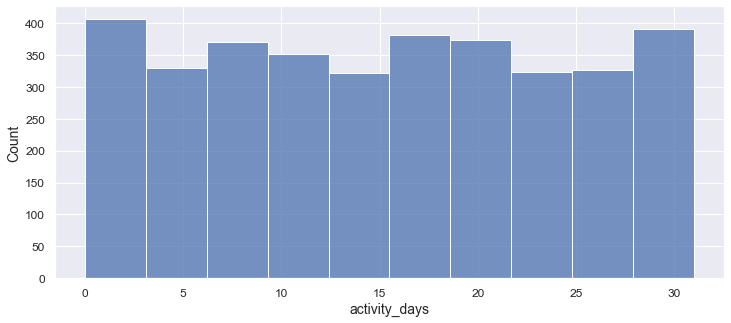

In [41]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x="activity_days", data=df, bins=10)

plt.show()

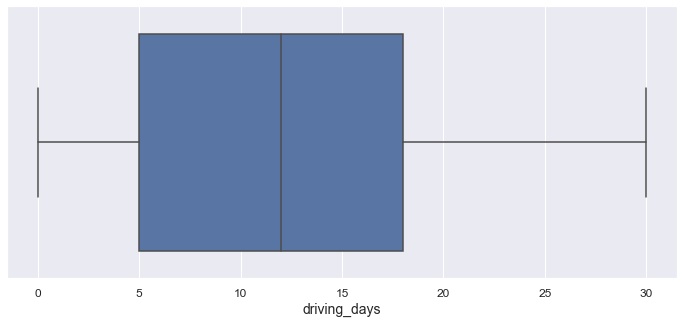

In [42]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x="driving_days", data=df)
plt.show()

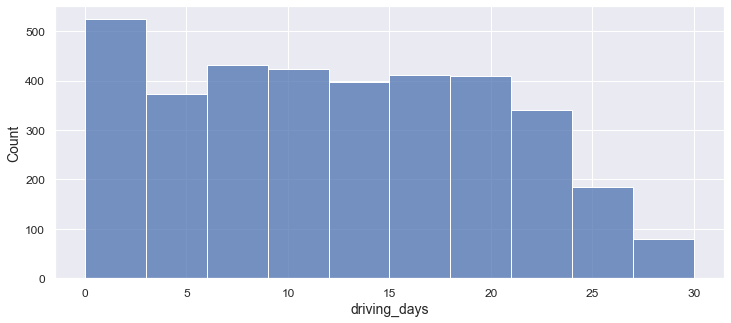

In [43]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x="driving_days", data=df, bins=10)

plt.show()

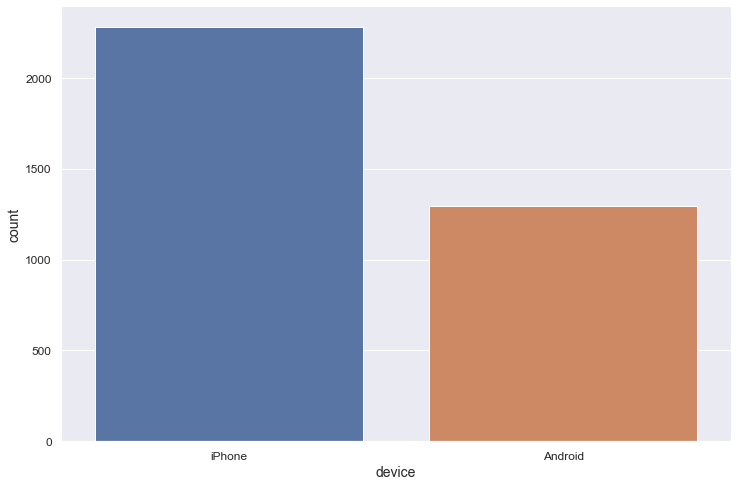

In [44]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="device", data=df)

plt.show()

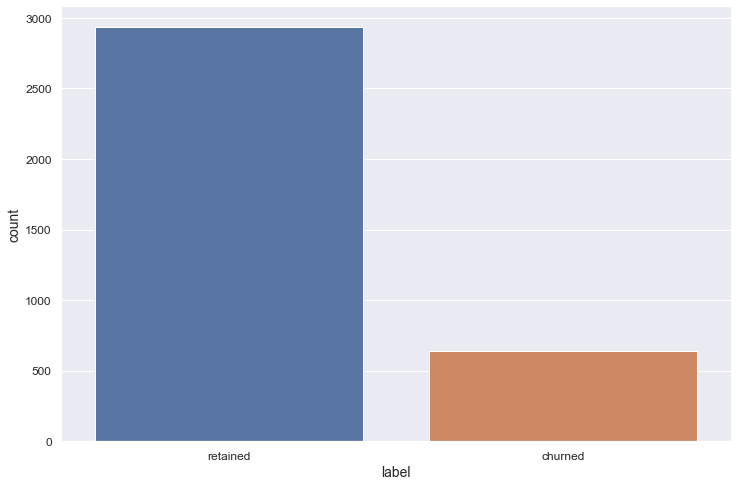

In [45]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="label", data=df)

plt.show()

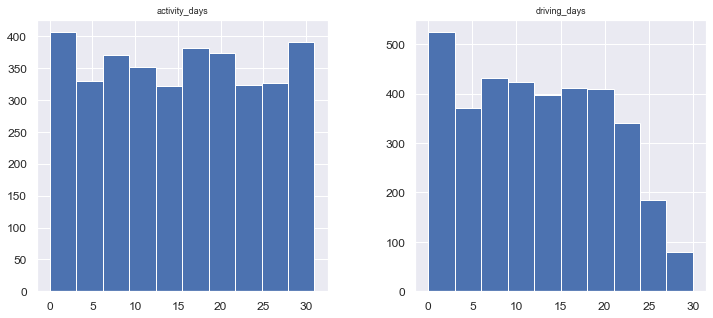

In [46]:
#Plot a histogram that, for each day, has a bar representing the counts of driving_days and user_days

df.hist(column=['activity_days', 'driving_days'], figsize=(12,5))

plt.show()

In [47]:
#Confirm the maximum number of days for each variable—driving_days and activity_days

df[['activity_days', 'driving_days']].max()

activity_days    31
driving_days     30
dtype: int64

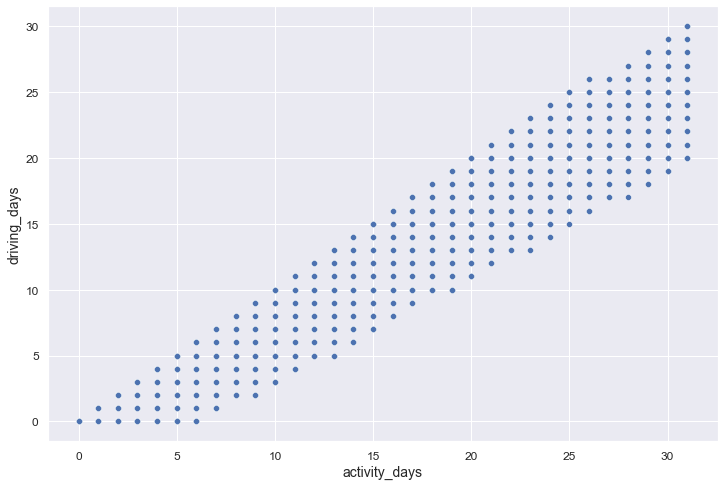

In [48]:
# Scatter plot

fig, ax = plt.subplots(figsize=(12,8))

sns.scatterplot(x="activity_days", y="driving_days" , data=df)

plt.show()

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

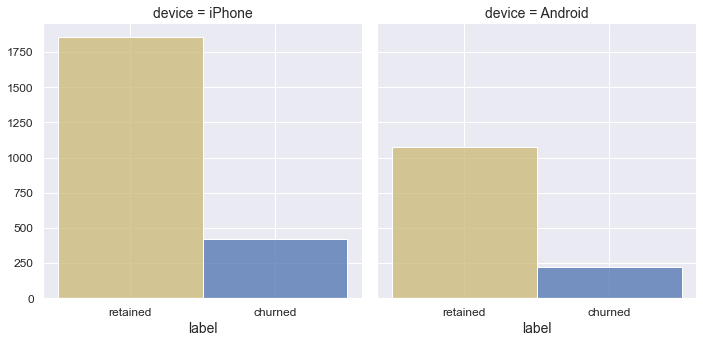

In [49]:
g = sns.FacetGrid(data=df, col="device", height=5, aspect=1, hue_kws={'color': ['y', 'b']}, hue="label")

g.map(sns.histplot, "label")



plt.show()

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [50]:
df["km_per_driving_day"] = df["driven_km_drives"]/df["driving_days"]

In [51]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,12012,retained,300,241,352.35,2771,77,0,4604.33,3312.22,14,12,iPhone,383.69
1,13818,retained,5,5,14.81,543,89,52,2729.33,643.09,27,22,iPhone,124.06
2,2205,retained,26,21,100.17,2411,73,21,3132.71,1724.41,27,23,iPhone,136.20
3,6703,retained,5,5,216.64,2329,108,0,1010.13,536.89,6,4,iPhone,252.53
4,5470,churned,54,48,105.97,1108,0,50,4319.07,1214.12,15,9,Android,479.90


In [52]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,3575.00,3575.00,3575.00,3575.00,3575.00,3575.00,3575.00,3575.00,3575.00,3575.00,3575.00,3575.00
mean,7600.53,78.76,65.74,189.63,1749.79,122.69,30.32,4030.23,1851.29,15.41,12.03,inf
std,4312.99,79.64,65.18,134.87,1020.90,151.36,46.44,2471.26,1405.83,8.89,7.76,NaN
min,8.00,0.00,0.00,1.20,7.00,0.00,0.00,159.44,23.02,0.00,0.00,9.45
25%,3987.00,22.00,20.00,90.67,846.00,9.50,0.00,2225.79,854.30,8.00,5.00,171.97
50%,7630.00,55.00,47.00,161.59,1725.00,72.00,9.00,3489.70,1485.99,16.00,12.00,332.54
75%,11346.50,110.00,91.00,255.04,2653.00,176.00,44.00,5253.95,2440.07,23.00,18.00,758.13
max,14998.00,743.00,596.00,933.89,3500.00,1236.00,375.00,19214.48,11328.68,31.00,30.00,inf


In [53]:
df["km_per_driving_day"].describe()

count   3575.00
mean        inf
std         NaN
min        9.45
25%      171.97
50%      332.54
75%      758.13
max         inf
Name: km_per_driving_day, dtype: float64

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

In [54]:
# fig, ax = plt.subplots(figsize=(12,5))

# sns.histplot(x="km_per_driving_day", data=df, bins=10)

# plt.show()

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

### Data Cleaning is done in different notebook

**==========================================================================================================**

# Statistics

## Conduct a hypothesis test

Now that you’ve organized your data and simulated random sampling, you’re ready to conduct your hypothesis test. Recall that the two-sample t-test is the standard approach for comparing the means of two independent samples. Let's review the steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a significance level
3.   Find the p-value 
4.   Reject or fail to reject the null hypothesis

### Step 1: State the null hypothesis and the alternative hypothesis

The **null hypothesis** is a statement that is assumed to be true unless there is convincing evidence to the contrary. The **alternative hypothesis** is a statement that contradicts the null hypothesis, and is accepted as true only if there is convincing evidence for it. 

In a two-sample t-test, the null hypothesis states that there is no difference between the means of your two groups. The alternative hypothesis states the contrary claim: there is a difference between the means of your two groups. 

We use $H_0$ to denote the null hypothesis, and $H_A$ to denote the alternative hypothesis.

*   $H_0$: There is no difference in the mean amount of rides
*   $H_A$: There is a difference in the mean amount of rides



In [55]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,12012,retained,300,241,352.35,2771,77,0,4604.33,3312.22,14,12,iPhone,383.69
1,13818,retained,5,5,14.81,543,89,52,2729.33,643.09,27,22,iPhone,124.06
2,2205,retained,26,21,100.17,2411,73,21,3132.71,1724.41,27,23,iPhone,136.20
3,6703,retained,5,5,216.64,2329,108,0,1010.13,536.89,6,4,iPhone,252.53
4,5470,churned,54,48,105.97,1108,0,50,4319.07,1214.12,15,9,Android,479.90


In [56]:
df_stats = df[["drives","device"]]

In [57]:
df_stats

,drives,device
0,241,iPhone
1,5,iPhone
2,21,iPhone
3,5,iPhone
4,48,Android
...,...,...
3570,87,Android
3571,42,iPhone
3572,58,Android
3573,27,iPhone


In [58]:
map_dictionary = {'Android': 2, 'iPhone': 1}
df_stats['device'] = df['device'].map(map_dictionary)
df_stats['device']

0       1
1       1
2       1
3       1
4       2
       ..
3570    2
3571    1
3572    2
3573    1
3574    1
Name: device, Length: 3575, dtype: int64

In [59]:
df_stats.head()

,drives,device
0,241,1
1,5,1
2,21,1
3,5,1
4,48,2


In [60]:
df_stats.groupby("device").mean()

,drives
device,
1,65.32
2,66.48


### Step 2: Choose a significance level

The **significance level** is the threshold at which you will consider a result statistically significant. This is the probability of rejecting the null hypothesis when it is true. The education department asks you to use their standard level of 5%, or 0.05. 

### Step 3: Find the p-value

**P-value** refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true.

Based on your sample data, the difference between the mean district literacy rates of STATE21 and STATE28 is 6.2 percentage points. Your null hypothesis claims that this difference is due to chance. Your p-value is the probability of observing an absolute difference in sample means that is 6.2 or greater *if* the null hypothesis is true. If the probability of this outcome is very unlikely - in particular, if your p-value is *less than* your significance level of 5% – then you will reject the null hypothesis.

#### `scipy.stats.ttest_ind()`

For a two-sample $t$-test, you can use `scipy.stats.ttest_ind()` to compute your p-value. This function includes the following arguments:

*   `a`: Observations from the first sample. 
*   `b`: Observations from the second sample.
*   `equal_var`: A boolean, or true/false statement, which indicates whether the population variance of the two samples is assumed to be equal. In our example, you don’t have access to data for the entire population, so you don’t want to assume anything about the variance. To avoid making a wrong assumption, set this argument to `False`. 

Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.


Now you’re ready to write your code and enter the relevant arguments: 

*   `a`: Your first sample refers to the district literacy rate data for STATE21, which is stored in the `OVERALL_LI` column of your variable `sampled_ state21`.
*   `b`: Your second sample refers to the district literacy rate data for STATE28, which is stored in the `OVERALL_LI` column of your variable `sampled_ state28`.
*   `equal_var`: Set to `False` because you don’t want to assume that the two samples have the same variance.

In [61]:
iphone = df_stats[df_stats["device"] == 1]
iphone

,drives,device
0,241,1
1,5,1
2,21,1
3,5,1
8,9,1
...,...,...
3565,203,1
3566,31,1
3571,42,1
3573,27,1


In [62]:
android = df_stats[df_stats["device"] == 2]
android

,drives,device
4,48,2
5,105,2
6,89,2
7,41,2
9,229,2
...,...,...
3567,41,2
3568,121,2
3569,8,2
3570,87,2


### Step 4: Reject or fail to reject the null hypothesis

To draw a conclusion, compare your p-value with the significance level.

*   If the p-value is less than the significance level, you conclude there is a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you reject the null hypothesis $H_0$.
*   If the p-value is greater than the significance level, you conclude there is *not* a statistically significant difference in the mean district literacy rates between STATE21 and STATE28. In other words, you fail to reject the null hypothesis $H_0$.

Your p-value of 0.0064, or 0.64%, is less than the significance level of 0.05, or 5%. So, you *reject* the null hypothesis, and conclude that there is a statistically significant difference between the mean district literacy rates of the two states STATE21 and STATE28. 

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


## T-Test

### Two Samples T-Test

```
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

```

**Ttest_indResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217)**

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender

In [63]:
t, p = scipy.stats.ttest_ind (a=iphone.drives, b=android.drives, equal_var = False)

In [64]:
print("T-test value is: ",t)
print("p-value value is: ",p)

T-test value is:  -0.5118023576947579
p-value value is:  0.6088315230750898


**Conclusion:** Since the p-value is more than alpha value 0.05, we fail to reject the null hypothesis

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [65]:
df.corr()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
ID,1.00,0.02,0.02,0.01,0.03,-0.01,0.02,-0.00,-0.01,-0.00,0.00,0.01
sessions,0.02,1.00,1.00,0.59,-0.01,0.01,0.02,0.02,0.02,0.02,0.01,-0.00
drives,0.02,1.00,1.00,0.59,-0.02,0.01,0.02,0.02,0.02,0.02,0.01,-0.01
total_sessions,0.01,0.59,0.59,1.00,0.02,0.00,0.02,0.01,0.02,0.01,-0.00,-0.01
n_days_after_onboarding,0.03,-0.01,-0.02,0.02,1.00,0.00,-0.01,0.02,-0.01,-0.04,-0.03,0.02
total_navigations_fav1,-0.01,0.01,0.01,0.00,0.00,1.00,0.01,-0.01,0.00,-0.01,-0.01,0.00
total_navigations_fav2,0.02,0.02,0.02,0.02,-0.01,0.01,1.00,0.01,0.01,-0.01,0.01,0.02
driven_km_drives,-0.00,0.02,0.02,0.01,0.02,-0.01,0.01,1.00,0.69,-0.01,-0.01,0.38
duration_minutes_drives,-0.01,0.02,0.02,0.02,-0.01,0.00,0.01,0.69,1.00,-0.02,-0.02,0.25
activity_days,-0.00,0.02,0.02,0.01,-0.04,-0.01,-0.01,-0.01,-0.02,1.00,0.95,-0.51


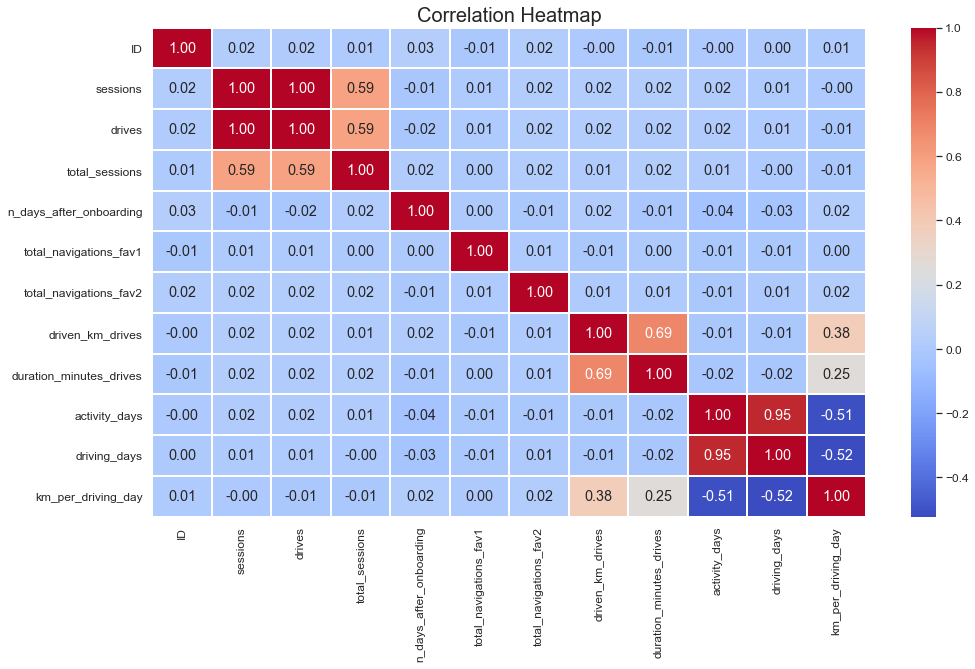

In [66]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

***

#### Python code done by Dennis Lam